### Imports

In [1]:
import mdtraj as md
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

### Load in Data from Ramachandran_Plotter

In [2]:
df_Ho_Open = pd.read_csv('../7oeu_Open/7oeu_Mono_Open_AllRamachandranPlot.csv')
df_Ho_Closed = pd.read_csv('../7oe2_closed/7oe2_Mono_Close_AllRamachandranPlot.csv')

In [27]:
df_Ho_Open

,PDBCode,ModelID,chainID,residueName,residueIndex,phi,psi,type
0,7oeu_Mono_Open,0,A,ASP,2,-89.677520,-170.035028,General
1,7oeu_Mono_Open,0,A,LEU,3,-68.036038,-17.939792,General
2,7oeu_Mono_Open,0,A,LEU,4,-75.958434,-25.842233,General
3,7oeu_Mono_Open,0,A,LYS,5,57.149478,38.844068,General
4,7oeu_Mono_Open,0,A,ARG,6,-72.747896,-27.819353,General
...,...,...,...,...,...,...,...,...
259,7oeu_Mono_Open,0,A,VAL,261,-130.854677,130.872440,Ile-Val
260,7oeu_Mono_Open,0,A,HIS,262,-88.778015,136.947125,General
261,7oeu_Mono_Open,0,A,LEU,263,-110.028661,120.582940,General
262,7oeu_Mono_Open,0,A,ARG,264,-81.901441,-164.665226,General


In [28]:
df_Ho_Closed

,PDBCode,ModelID,chainID,residueName,residueIndex,phi,psi,type
0,7oe2_Mono_Close,0,A,ASP,2,-78.874394,-11.549732,General
1,7oe2_Mono_Close,0,A,LEU,3,-69.145137,-19.396853,General
2,7oe2_Mono_Close,0,A,LEU,4,-78.695947,-23.518470,General
3,7oe2_Mono_Close,0,A,LYS,5,56.853726,40.400087,General
4,7oe2_Mono_Close,0,A,ARG,6,-75.000459,-27.156511,General
...,...,...,...,...,...,...,...,...
259,7oe2_Mono_Close,0,A,VAL,261,-124.210673,133.076562,Ile-Val
260,7oe2_Mono_Close,0,A,HIS,262,-90.292873,133.728224,General
261,7oe2_Mono_Close,0,A,LEU,263,-106.578610,127.980736,General
262,7oe2_Mono_Close,0,A,ARG,264,-77.665681,138.280089,General


### Extract Angles and convert to array

In [3]:
# Open Conformation
Ho_O_phi = df_Ho_Open['phi'].to_numpy()
Ho_O_psi = df_Ho_Open['psi'].to_numpy()
# Closed Conformation
Ho_C_phi = df_Ho_Closed['phi'].to_numpy()
Ho_C_psi = df_Ho_Closed['psi'].to_numpy()

## Calculate phi and psi angles for each amino acid in each state

In [4]:
change_in_phi = []
for i in range(0, len(Ho_O_phi)):
    change = (Ho_C_phi[i] - Ho_O_phi[i])
    if -180 <= change <= 180:
        change_in_phi.append(Ho_C_phi[i] - Ho_O_phi[i])
    if change > 180:
        change_in_phi.append(360 - (Ho_C_phi[i] - Ho_O_phi[i]))
    if change < -180:
        change_in_phi.append(360 + (Ho_C_phi[i] - Ho_O_phi[i]))

In [5]:
change_in_psi = []
for i in range(0, len(Ho_O_psi)):
    change = (Ho_C_psi[i] - Ho_O_psi[i])
    if -180 <= change <= 180:
        change_in_psi.append(Ho_C_psi[i] - Ho_O_psi[i])
    if change > 180:
        change_in_psi.append(360 - (Ho_C_psi[i] - Ho_O_psi[i]))
    if change < -180:
        change_in_psi.append(360 + (Ho_C_psi[i] - Ho_O_psi[i]))

In [21]:
x = range(2, len(change_in_phi)+2, 1)

In [22]:
print(x)

range(2, 266)


## Plot

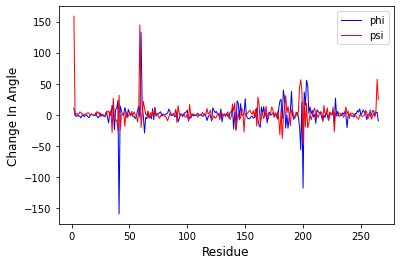

In [88]:
# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(178, 193)
#ax.set_ylim(0.075, 0.125)
ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Change In Angle', fontsize=12)


ax.plot(x, change_in_phi, linewidth=1.0, color="blue", label="phi")
ax.plot(x, change_in_psi, linewidth=1.0, color="red", label="psi")
ax.legend(fontsize=10)


plt.savefig('EncHo_phipsi_change.png')

In [25]:
# Put lists into dataframe

phipsi_df = pd.DataFrame(
    {'change_in_phi':change_in_phi,
     'change_in_psi':change_in_psi
    },
    index = x
)

In [26]:
phipsi_df

,change_in_phi,change_in_psi
2,10.803126,158.485296
3,-1.109099,-1.457061
4,-2.737512,2.323763
5,-0.295752,1.556019
6,-2.252563,0.662842
...,...,...
261,6.644004,2.204123
262,-1.514859,-3.218901
263,3.450051,7.397796
264,4.235760,57.054685


In [57]:
phipsi_df.iloc[0]

change_in_phi     10.803126
change_in_psi    158.485296
Name: 2, dtype: float64

##### Index starts at 0 despite index = x, so . . . move index by 2?

In [69]:
# A-Loop
phipsi_df['change_in_phi'].iloc[177:191]

179    10.333737
180    22.233382
181    24.923161
182    -6.506162
183    39.716700
184    25.585052
185   -21.483354
186     0.228360
187   -21.631551
188    -4.199503
189     4.829463
190    37.451320
191    -0.915622
192    -7.452314
Name: change_in_phi, dtype: float64

In [73]:
# Hinge 1
phipsi_df['change_in_phi'].iloc[119:130]

121   -10.000586
122    11.132437
123     7.011539
124     3.434048
125     5.381699
126     1.174315
127     0.970048
128    -2.459422
129     9.254157
130   -11.253697
131     0.435967
Name: change_in_phi, dtype: float64

In [76]:
# Hinge 2
phipsi_df['change_in_phi'].iloc[199:220]

201    36.395000
202    15.342576
203    55.641880
204    47.445899
205     2.191820
206    12.648718
207     1.427459
208     6.916747
209    -3.328059
210     0.549535
211   -13.633694
212     7.924003
213     5.105338
214     3.357937
215     3.739764
216    -3.282624
217   -10.297424
218    -0.705055
219    -4.342059
220     4.682666
221    -1.342083
Name: change_in_phi, dtype: float64

In [81]:
# Largest
phipsi_df.nlargest(n=15, columns=['change_in_phi'])

,change_in_phi,change_in_psi
60,132.732530,-20.415823
203,55.641880,18.513827
204,47.445899,-21.083364
183,39.716700,-4.608469
190,37.451320,7.921972
201,36.395000,24.611285
228,26.779159,3.210291
150,25.710860,2.106761
184,25.585052,11.165161
181,24.923161,8.804303


In [82]:
# Largest
phipsi_df.nlargest(n=15, columns=['change_in_psi'])

,change_in_phi,change_in_psi
2,10.803126,158.485296
59,-4.032343,144.332020
264,4.235760,57.054685
198,-56.388552,56.202576
197,-20.537038,44.864058
199,20.295453,38.458043
41,-159.485104,31.372465
185,-21.483354,30.735878
161,-8.177172,28.334851
36,6.267411,26.576010


## A-Loop

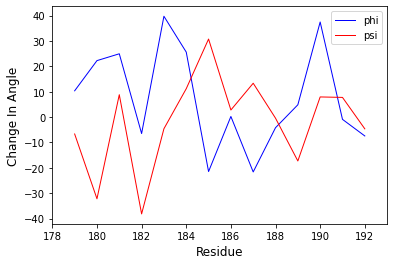

In [84]:
# Section Database, A-loop want 179 to 192 move index by 2
M = np.arange(179, 193, 1)


# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(178, 193)
#ax.set_ylim(0.075, 0.125)
ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Change In Angle', fontsize=12)


ax.plot(M, phipsi_df['change_in_phi'].iloc[177:191], linewidth=1.0, color="blue", label="phi")
ax.plot(M, phipsi_df['change_in_psi'].iloc[177:191], linewidth=1.0, color="red", label="psi")
ax.legend()

plt.savefig('EncHo-phipsi-Aloop.png')

## Hinge 1

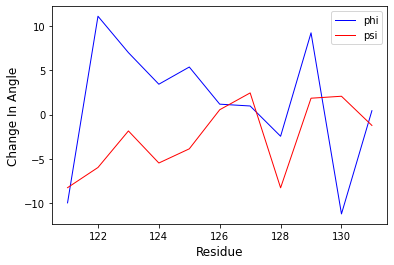

In [85]:
# Section Database
A = np.arange(121, 132, 1)


# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(178, 193)
#ax.set_ylim(0.075, 0.125)
ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Change In Angle', fontsize=12)


ax.plot(A, phipsi_df['change_in_phi'].iloc[119:130], linewidth=1.0, color="blue", label="phi")
ax.plot(A, phipsi_df['change_in_psi'].iloc[119:130], linewidth=1.0, color="red", label="psi")
ax.legend()

plt.savefig('EncHo-phipsi-Hinge1.png')

## Hinge 2

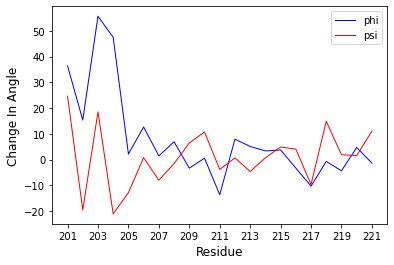

In [86]:
# Section Database
C = np.arange(201, 222, 1)


# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(200, 222)
#ax.set_ylim(0.075, 0.125)
ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Change In Angle', fontsize=12)
ax.set_xticks(np.arange(201,222,2))


ax.plot(C, phipsi_df['change_in_phi'].iloc[199:220], linewidth=1.0, color="blue", label="phi")
ax.plot(C, phipsi_df['change_in_psi'].iloc[199:220], linewidth=1.0, color="red", label="psi")
ax.legend()


plt.savefig('EncHo-phipsi-Hinge2.png')

In [30]:
# Smallest
phipsi_df.nsmallest(n=10, columns=['change_in_phi'])

,change_in_phi,change_in_psi
41,-159.485104,31.372465
200,-117.894938,-47.237585
198,-56.388552,56.202576
63,-29.216943,10.794590
37,-23.862624,-4.385875
142,-23.688100,-25.137738
140,-22.687068,6.567401
187,-21.631551,13.320706
185,-21.483354,30.735878
238,-20.746664,1.212284
